# Classification Example

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import balanced_accuracy_score, accuracy_score, precision_score, recall_score, make_scorer

# Validation
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, cross_val_predict

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## Load Data

In [2]:
# Load the dataset directly from sklearn's datasets
data = load_breast_cancer()
df = pd.DataFrame(data=np.c_[ data.data, data.target ],  
                  columns=np.append(data.feature_names, 'target'))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
df.shape

(569, 31)

In [4]:
df['target'].value_counts()

target
1.0    357
0.0    212
Name: count, dtype: int64

## Train / Test

In [5]:
X = df.drop('target', axis=1)
y = df['target']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

## Cross-validation

In [6]:
# Declare KFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [7]:
# Declare scores to be used
scoring = {
    'Acc': make_scorer(accuracy_score),
    'Prec': make_scorer(precision_score),
    'Rec': make_scorer(recall_score)
}

In [8]:
def print_metrics(cv_results):
    for sc in scoring.keys():
        print(f'Train {sc}:', cv_results[f'train_{sc}'].mean().round(2))
    print()
    for sc in scoring.keys():
        print(f'Validation {sc}:', cv_results[f'test_{sc}'].mean().round(2))

## Baseline

In [9]:
from sklearn.dummy import DummyClassifier

In [10]:
bl = DummyClassifier(strategy='stratified')
bl_cv = cross_validate(bl, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(bl_cv)

Train Acc: 0.53
Train Prec: 0.63
Train Rec: 0.62

Validation Acc: 0.52
Validation Prec: 0.62
Validation Rec: 0.6


## Logistic Regression

In [11]:
lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=10_000))
])
lr_cv = cross_validate(lr, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(lr_cv)

Train Acc: 0.99
Train Prec: 0.99
Train Rec: 1.0

Validation Acc: 0.98
Validation Prec: 0.98
Validation Rec: 0.99


## K-Neighbours Classifier

In [12]:
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5, p=1))
])
knn_cv = cross_validate(knn, X_train, y_train, cv=kf,
                        scoring=scoring, return_train_score=True)

print_metrics(knn_cv)

Train Acc: 0.98
Train Prec: 0.97
Train Rec: 0.99

Validation Acc: 0.96
Validation Prec: 0.96
Validation Rec: 0.98


### Confusion Matrix Example

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

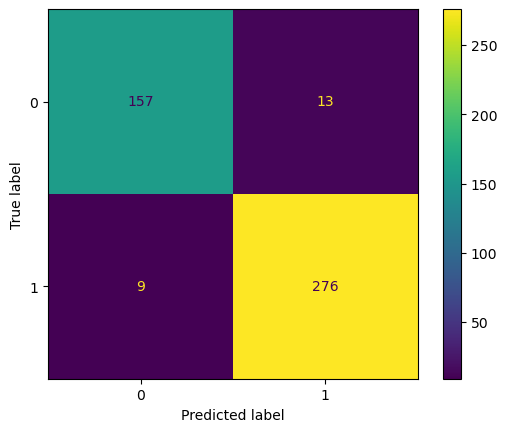

In [14]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)
# cross_val_predict returns the predictions for each data point in the validation sets
val_preds = cross_val_predict(knn, X_train, y_train, cv=kf)

cm = confusion_matrix(y_train, val_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot()
plt.show()

## Decision Tree

In [15]:
from sklearn.tree import plot_tree

In [16]:
dt = DecisionTreeClassifier(max_depth=2)
dt_cv = cross_validate(dt, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(dt_cv)

Train Acc: 0.95
Train Prec: 0.97
Train Rec: 0.96

Validation Acc: 0.93
Validation Prec: 0.95
Validation Rec: 0.93


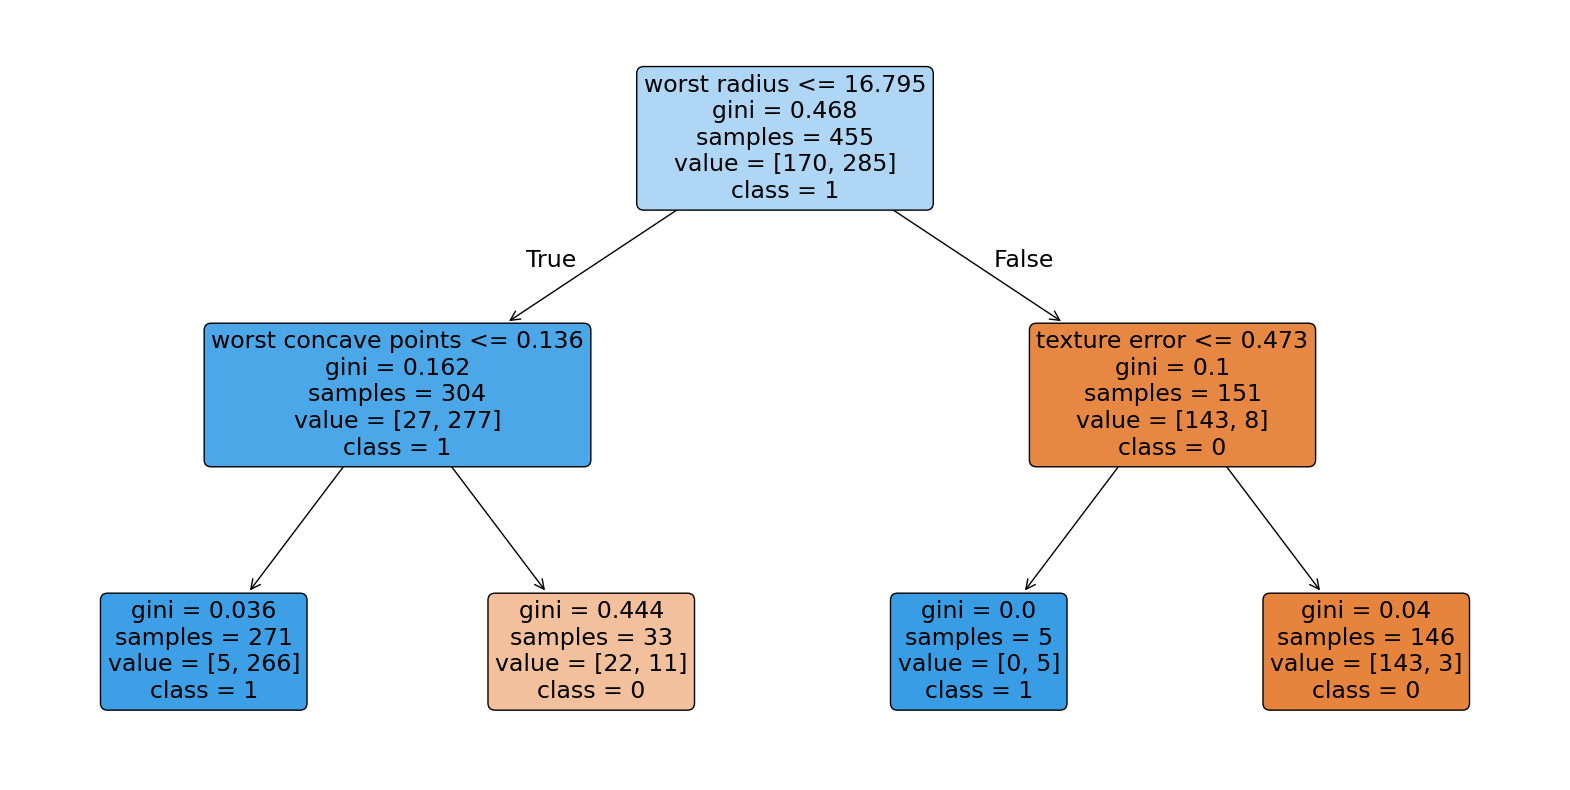

In [17]:
dt.fit(X_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=list(X.columns),
          class_names=['0', '1'], rounded=True)
plt.show()

### Predicted Probabilities

`cross_val_predict()` function performs cross-validation and returns the predictions for each instance in the training set as if each instance were in a validation set:
- It splits the training data into multiple "folds" (validation sets).
- For each fold, it trains the model on the other folds (excluding the validation set).
- It then uses the model to make predictions on the validation set.
- Result: You get predictions for the entire training set, but importantly, the model never sees the instances it's predicting (they were always held out for validation during training).
- Returning probabilities: The `cross_val_predict()` function has an option to return class probabilities instead of just class predictions. You can enable this by setting `method="predict_proba"` in the function call. This provides the probabilities of each class for each instance, which can be useful when you want to assess the model's confidence in its predictions.

In [18]:
# This provides predictions for the entire training set, with each prediction made on data the model hasn’t seen during training
y_pred = cross_val_predict(dt, X_train, y_train, cv=kf)
y_pred

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0.

In [19]:
# This provides predicted probabilities for each class and instance on the entire training set,
# with each prediction made on data the model hasn’t seen during training
# For each row, it gives 2 probabilities: probability of class 0 and probability of class 1
y_pred_prob = cross_val_predict(dt, X_train, y_train, cv=kf, method='predict_proba')
y_pred_prob

array([[0.03891051, 0.96108949],
       [0.97709924, 0.02290076],
       [0.02489627, 0.97510373],
       [0.02459016, 0.97540984],
       [0.03488372, 0.96511628],
       [0.02811245, 0.97188755],
       [0.02489627, 0.97510373],
       [0.0203252 , 0.9796748 ],
       [0.02459016, 0.97540984],
       [0.36842105, 0.63157895],
       [0.03488372, 0.96511628],
       [0.36842105, 0.63157895],
       [0.96428571, 0.03571429],
       [0.0203252 , 0.9796748 ],
       [0.98449612, 0.01550388],
       [0.028     , 0.972     ],
       [0.992     , 0.008     ],
       [0.02459016, 0.97540984],
       [0.992     , 0.008     ],
       [0.97709924, 0.02290076],
       [0.028     , 0.972     ],
       [0.03891051, 0.96108949],
       [0.03488372, 0.96511628],
       [0.992     , 0.008     ],
       [0.02489627, 0.97510373],
       [0.028     , 0.972     ],
       [0.575     , 0.425     ],
       [0.97727273, 0.02272727],
       [0.01659751, 0.98340249],
       [0.95683453, 0.04316547],
       [0.

In [ ]:
# Probability of class 1
y_prob1 = y_pred_prob[:, 1]
y_prob1

array([0.96108949, 0.02290076, 0.97510373, 0.97540984, 0.96511628,
       0.97188755, 0.97510373, 0.9796748 , 0.97540984, 0.63157895,
       0.96511628, 0.63157895, 0.03571429, 0.9796748 , 0.01550388,
       0.972     , 0.008     , 0.97540984, 0.008     , 0.02290076,
       0.972     , 0.96108949, 0.96511628, 0.008     , 0.97510373,
       0.972     , 0.425     , 0.02272727, 0.98340249, 0.04316547,
       0.97188755, 0.02272727, 0.97188755, 0.96511628, 0.02272727,
       0.03571429, 0.02290076, 0.63157895, 0.00847458, 0.97916667,
       0.97188755, 0.9796748 , 0.5       , 0.9796748 , 0.2       ,
       0.97916667, 0.97510373, 0.03571429, 0.97540984, 0.00847458,
       0.00847458, 0.008     , 0.125     , 0.98340249, 0.97188755,
       0.96511628, 0.97188755, 0.28      , 0.97188755, 0.98360656,
       0.98360656, 0.98340249, 0.00847458, 0.96108949, 0.96108949,
       0.972     , 0.008     , 0.97188755, 0.96511628, 0.972     ,
       0.06666667, 0.96511628, 0.97510373, 0.05      , 0.97916

In [ ]:
# Prediction with threshold for the probability of class 1 > 80%
(y_prob1 >= 0.8).astype(int)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,

In [ ]:
# With `predict` method, the decision threshold is 50% by default
print('Precision:', round(precision_score(y_test, dt.predict(X_test)), 2))
print('Recall:', round(recall_score(y_test, dt.predict(X_test)), 2))

Precision: 0.97
Recall: 0.86


In [ ]:
y_test_prob1 = dt.predict_proba(X_test)[:, 1]
d = {}

# Sweep across different threshold values and check how this affects precision and recall
for th in np.arange(0, 1.1, 0.1):
    y_test_pred = (y_test_prob1 >= th).astype(int)
    d[th] = {
        'precision': round(precision_score(y_test, y_test_pred), 2),
        'recall': round(recall_score(y_test, y_test_pred), 2)
    }

In [39]:
pd.DataFrame(d)

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
precision,0.63,0.91,0.91,0.91,0.97,0.97,0.97,0.97,0.97,0.97,0.0
recall,1.00,0.96,0.96,0.96,0.86,0.86,0.86,0.86,0.86,0.86,0.0
